# Cracking the Code: How Computers 'Taste' Words
### Word Embeddings, Cosine Similarity, and PCA Visualization

## Conceptual Word Embeddings & Cosine Similarity

In [1]:
# Install/Upgrade dependencies
!pip install --upgrade gensim

  Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.1 kB)
Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (26.7 MB)
  Attempting uninstall: gensim
    Found existing installation: gensim 4.3.0
    Uninstalling gensim-4.3.0:
      Successfully uninstalled gensim-4.3.0


In [5]:
# Import dependencies
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from matplotlib.lines import Line2D
import gensim.downloader as api
import warnings
from matplotlib.lines import Line2D

In [6]:
# Define conceptual embeddings
chai = np.array([0.7, 0.2, 0.6, 0.8])
coffee = np.array([0.3, 0.8, 0.9, 0.2])
cola = np.array([0.9, 0.1, 0.2, 0.1])
matcha = np.array([0.4, 0.6, 0.5, 0.3])

def cosine_similarity(a, b):
    return np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))

print("Chai vs Coffee:", cosine_similarity(chai, coffee))
print("Chai vs Cola:", cosine_similarity(chai, cola))
print("Chai vs Matcha:", cosine_similarity(chai, matcha))


Chai vs Coffee: 0.6881918399721734
Chai vs Cola: 0.7367388706141536
Chai vs Matcha: 0.8194697235133083


## Word Analogies with Conceptual Vectors

In [7]:

# Word analogy: king - man + woman ≈ queen
king_vec = np.array([0.8, 0.2, 0.1, 0.9])
man_vec = np.array([0.7, 0.1, 0.0, 0.8])
woman_vec = np.array([0.1, 0.7, 0.8, 0.0])
queen_vec = np.array([0.2, 0.8, 0.9, 0.1])

analogy_vec = king_vec - man_vec + woman_vec
similarity_to_queen = cosine_similarity(analogy_vec, queen_vec)
print("Cosine Similarity (king - man + woman ≈ queen):", round(similarity_to_queen, 3))


Cosine Similarity (king - man + woman ≈ queen): 1.0


## PCA Visualization (Dummy Vectors)

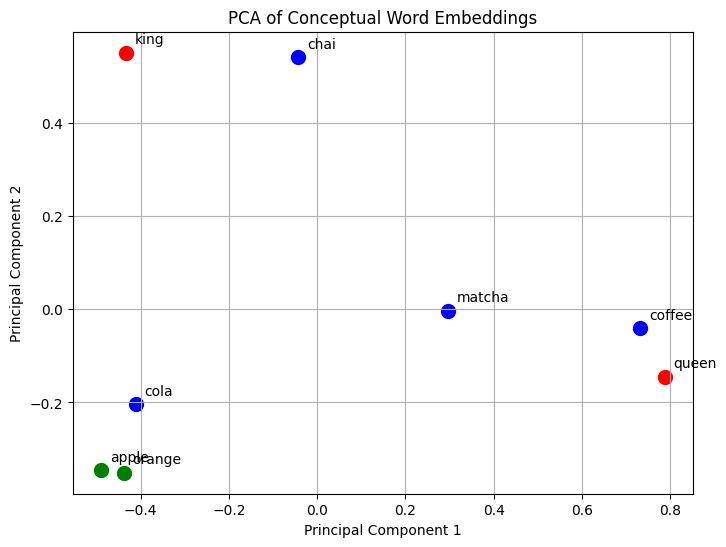

In [8]:
# Dummy vectors for visualization
dummy_vectors = {
    "chai": chai, "coffee": coffee, "cola": cola, "matcha": matcha,
    "king": king_vec, "queen": queen_vec,
    "apple": np.array([0.8, 0.1, 0.0, 0.0]), "orange": np.array([0.75, 0.15, 0.0, 0.0])
}

words = list(dummy_vectors.keys())
vecs = np.array(list(dummy_vectors.values()))

pca = PCA(n_components=2)
vecs_2d = pca.fit_transform(vecs)

colors = {
    "chai": 'blue', "coffee": 'blue', "cola": 'blue', "matcha": 'blue',
    "king": 'red', "queen": 'red', "apple": 'green', "orange": 'green'
}

plt.figure(figsize=(8,6))
for i, word in enumerate(words):
    plt.scatter(vecs_2d[i, 0], vecs_2d[i, 1], color=colors[word], s=100)
    plt.annotate(word, (vecs_2d[i, 0]+0.02, vecs_2d[i, 1]+0.02))

plt.title("PCA of Conceptual Word Embeddings")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()


## PCA Visualization (Real embeddings)

Loading GloVe model...
[==================================================] 100.0% 66.0/66.0MB downloaded
Loaded: 400000 words, vector size: 50


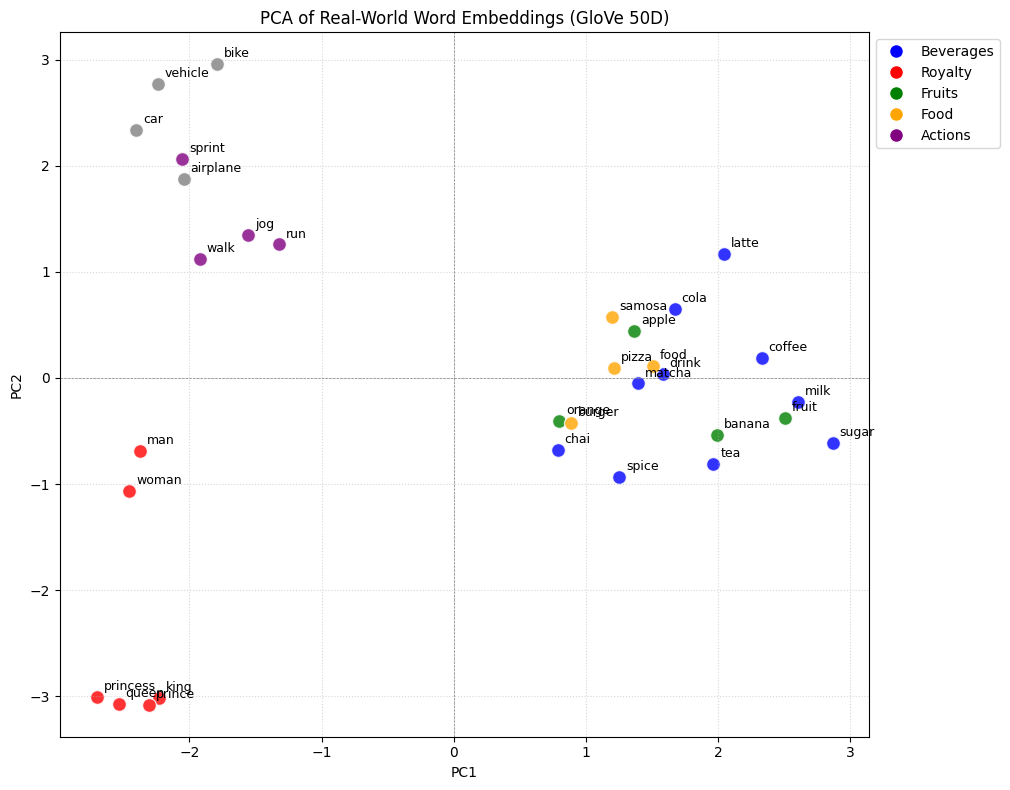

In [9]:
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Load pre-trained GloVe model (50D)
print("Loading GloVe model...")
word_vectors = api.load("glove-wiki-gigaword-50")
print(f"Loaded: {len(word_vectors.index_to_key)} words, vector size: {word_vectors.vector_size}")

# Define words
selected_words = [
    "chai", "coffee", "matcha", "latte", "cola", "drink",
    "king", "queen", "man", "woman", "prince", "princess",
    "tea", "milk", "sugar", "spice",
    "car", "bike", "airplane", "vehicle",
    "apple", "orange", "banana", "fruit",
    "samosa", "pizza", "burger", "food",
    "run", "walk", "jog", "sprint"
]

# Filter and extract vectors
words = [w for w in selected_words if w in word_vectors.key_to_index]
vectors = np.array([word_vectors[w] for w in words])

# Apply PCA
pca = PCA(n_components=2)
vectors_2d = pca.fit_transform(vectors)

# Semantic groups and colors
groups = {
    'Beverages': ["chai", "coffee", "matcha", "latte", "cola", "drink", "tea", "milk", "sugar", "spice"],
    'Royalty': ["king", "queen", "man", "woman", "prince", "princess"],
    'Fruits': ["apple", "orange", "banana", "fruit"],
    'Food': ["samosa", "pizza", "burger", "food"],
    'Actions': ["run", "walk", "jog", "sprint"]
}
colors = ['blue', 'red', 'green', 'orange', 'purple']
color_map = {word: colors[i] for i, (group, words) in enumerate(groups.items()) for word in words}

# Plot
plt.figure(figsize=(12, 8))
for i, word in enumerate(words):
    color = color_map.get(word, 'gray')
    plt.scatter(vectors_2d[i, 0], vectors_2d[i, 1], color=color, s=100, alpha=0.8, edgecolors='w')
    plt.annotate(word, (vectors_2d[i, 0], vectors_2d[i, 1]), fontsize=9, xytext=(5, 5), textcoords='offset points')

legend_elements = [Line2D([0], [0], marker='o', color='w', label=group, markerfacecolor=colors[i], markersize=10)
                   for i, group in enumerate(groups.keys())]
plt.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(1, 1))
plt.axhline(0, linestyle='--', linewidth=0.5, color='gray')
plt.axvline(0, linestyle='--', linewidth=0.5, color='gray')
plt.title("PCA of Real-World Word Embeddings (GloVe 50D)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True, linestyle=':', alpha=0.5)
plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()
